In [59]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [60]:
df = pd.read_csv(r'C:\Users\Sanchit\Downloads\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# cleaning 

In [61]:
len(df)

1460

In [62]:
# % of null values in each column
round((df.isnull().sum()/len(df))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [63]:
# Alley','PoolQC','MiscFeature','Fence' , have large null values and can de removed from dataset.
df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace = True)
df.shape

(1460, 77)

In [64]:
df.drop(['Id'],axis=1, inplace=True)


In [65]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


In [66]:
# changing dtype of yr sold to object.
df['YrSold'] = df['YrSold'].astype('object')

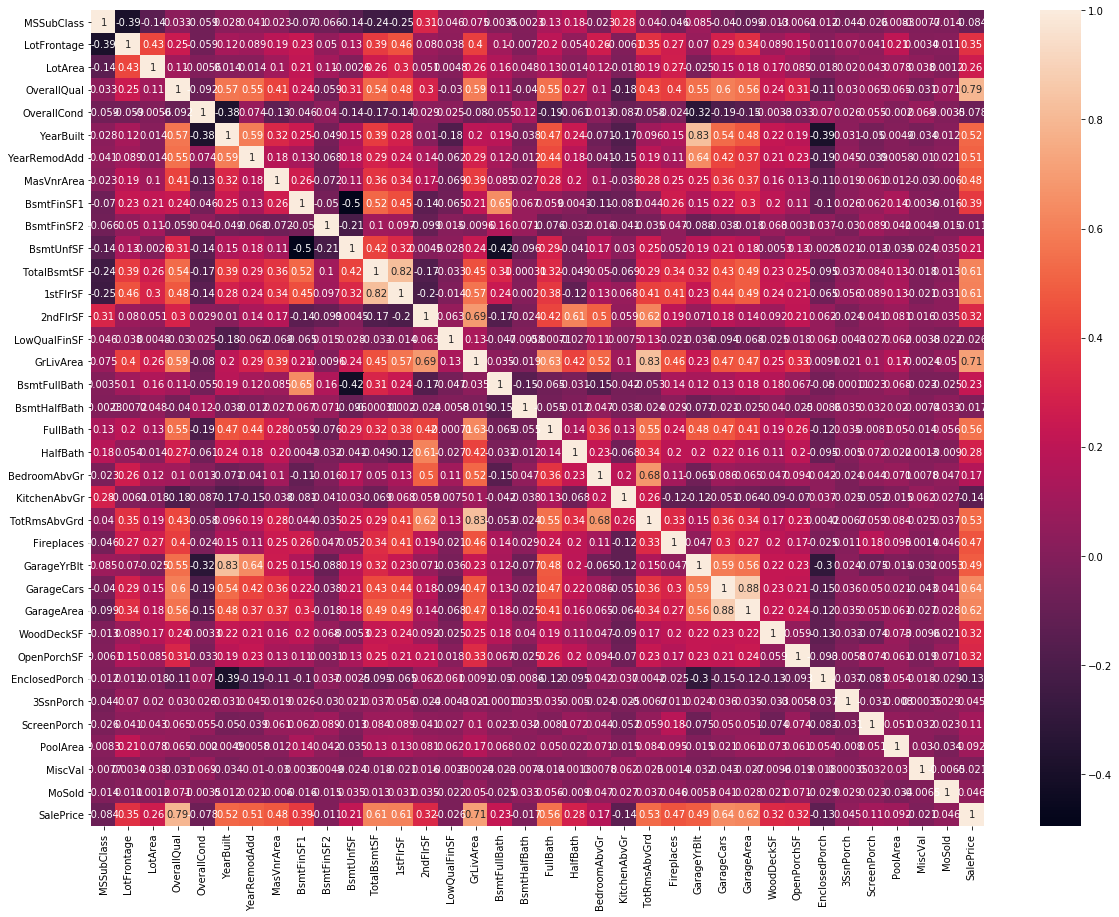

In [67]:
plt.figure(figsize = (20, 15))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

# 

In [68]:
# deriving numerical columns.
df_num = df.select_dtypes(['int64','float64'])
df_num.shape

(1460, 36)

In [69]:
# deriving categorical columns
df_cat = df.select_dtypes(['object'])
df_cat.shape

(1460, 40)

# EDA

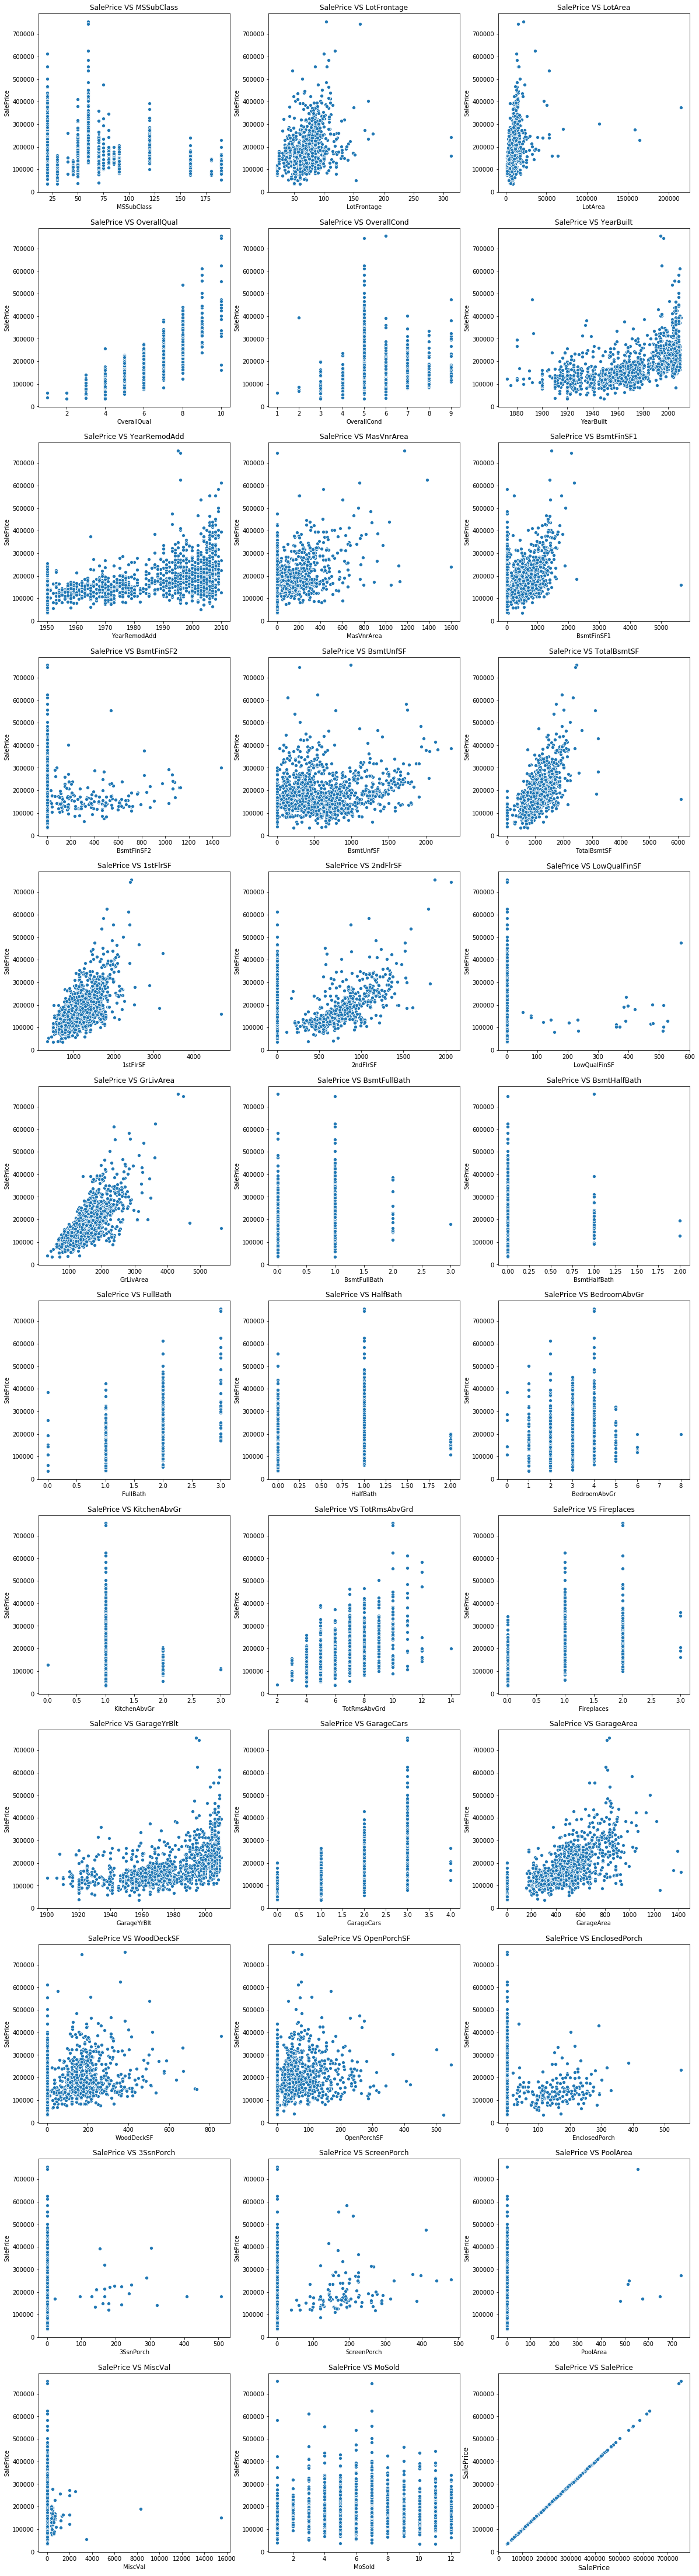

In [70]:
#Visualising numerical vs  Target Variables
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice',data=df_num,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_title('SalePrice'+' VS '+str(i))

In [71]:
def plot_categorical(lst):
    plt.figure(figsize=(20,50))
    cols = 3
    rows = len(lst)//3 + 1
    for i in range(1,len(lst)):
        plt.subplot(rows, 3, i)
        sns.boxplot(x=lst[i-1], y='SalePrice', data=df)
    plt.show()

In [72]:
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

In [73]:
#converting year to number of years
df['YearBuilt'] = 2019 - df['YearBuilt']
df['YearRemodAdd'] = 2019 - df['YearRemodAdd']
df['GarageYrBlt'] = 2019 - df['GarageYrBlt']
df['YrSold'] = 2019 - df['YrSold']

In [74]:
#

In [75]:
#converting from int type to object to treat the variables as categorical variables
df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('object')
df['FullBath'] = df['FullBath'].astype('object')
df['HalfBath'] = df['HalfBath'].astype('object')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('object')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('object')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('object')
df['Fireplaces'] = df['Fireplaces'].astype('object')
df['GarageCars'] = df['GarageCars'].astype('object')

In [76]:
# Find out the remaining columns with null values 
null_cols = round(100*df.isnull().sum()/len(df.index),2).sort_values(ascending=False)
null_cols = null_cols[null_cols > 0]
null_cols


FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [77]:
# filling objects with null and numerics to 0 
for col in null_cols.index:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('none')
    else:
        df[col] = df[col].fillna(0)

In [78]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

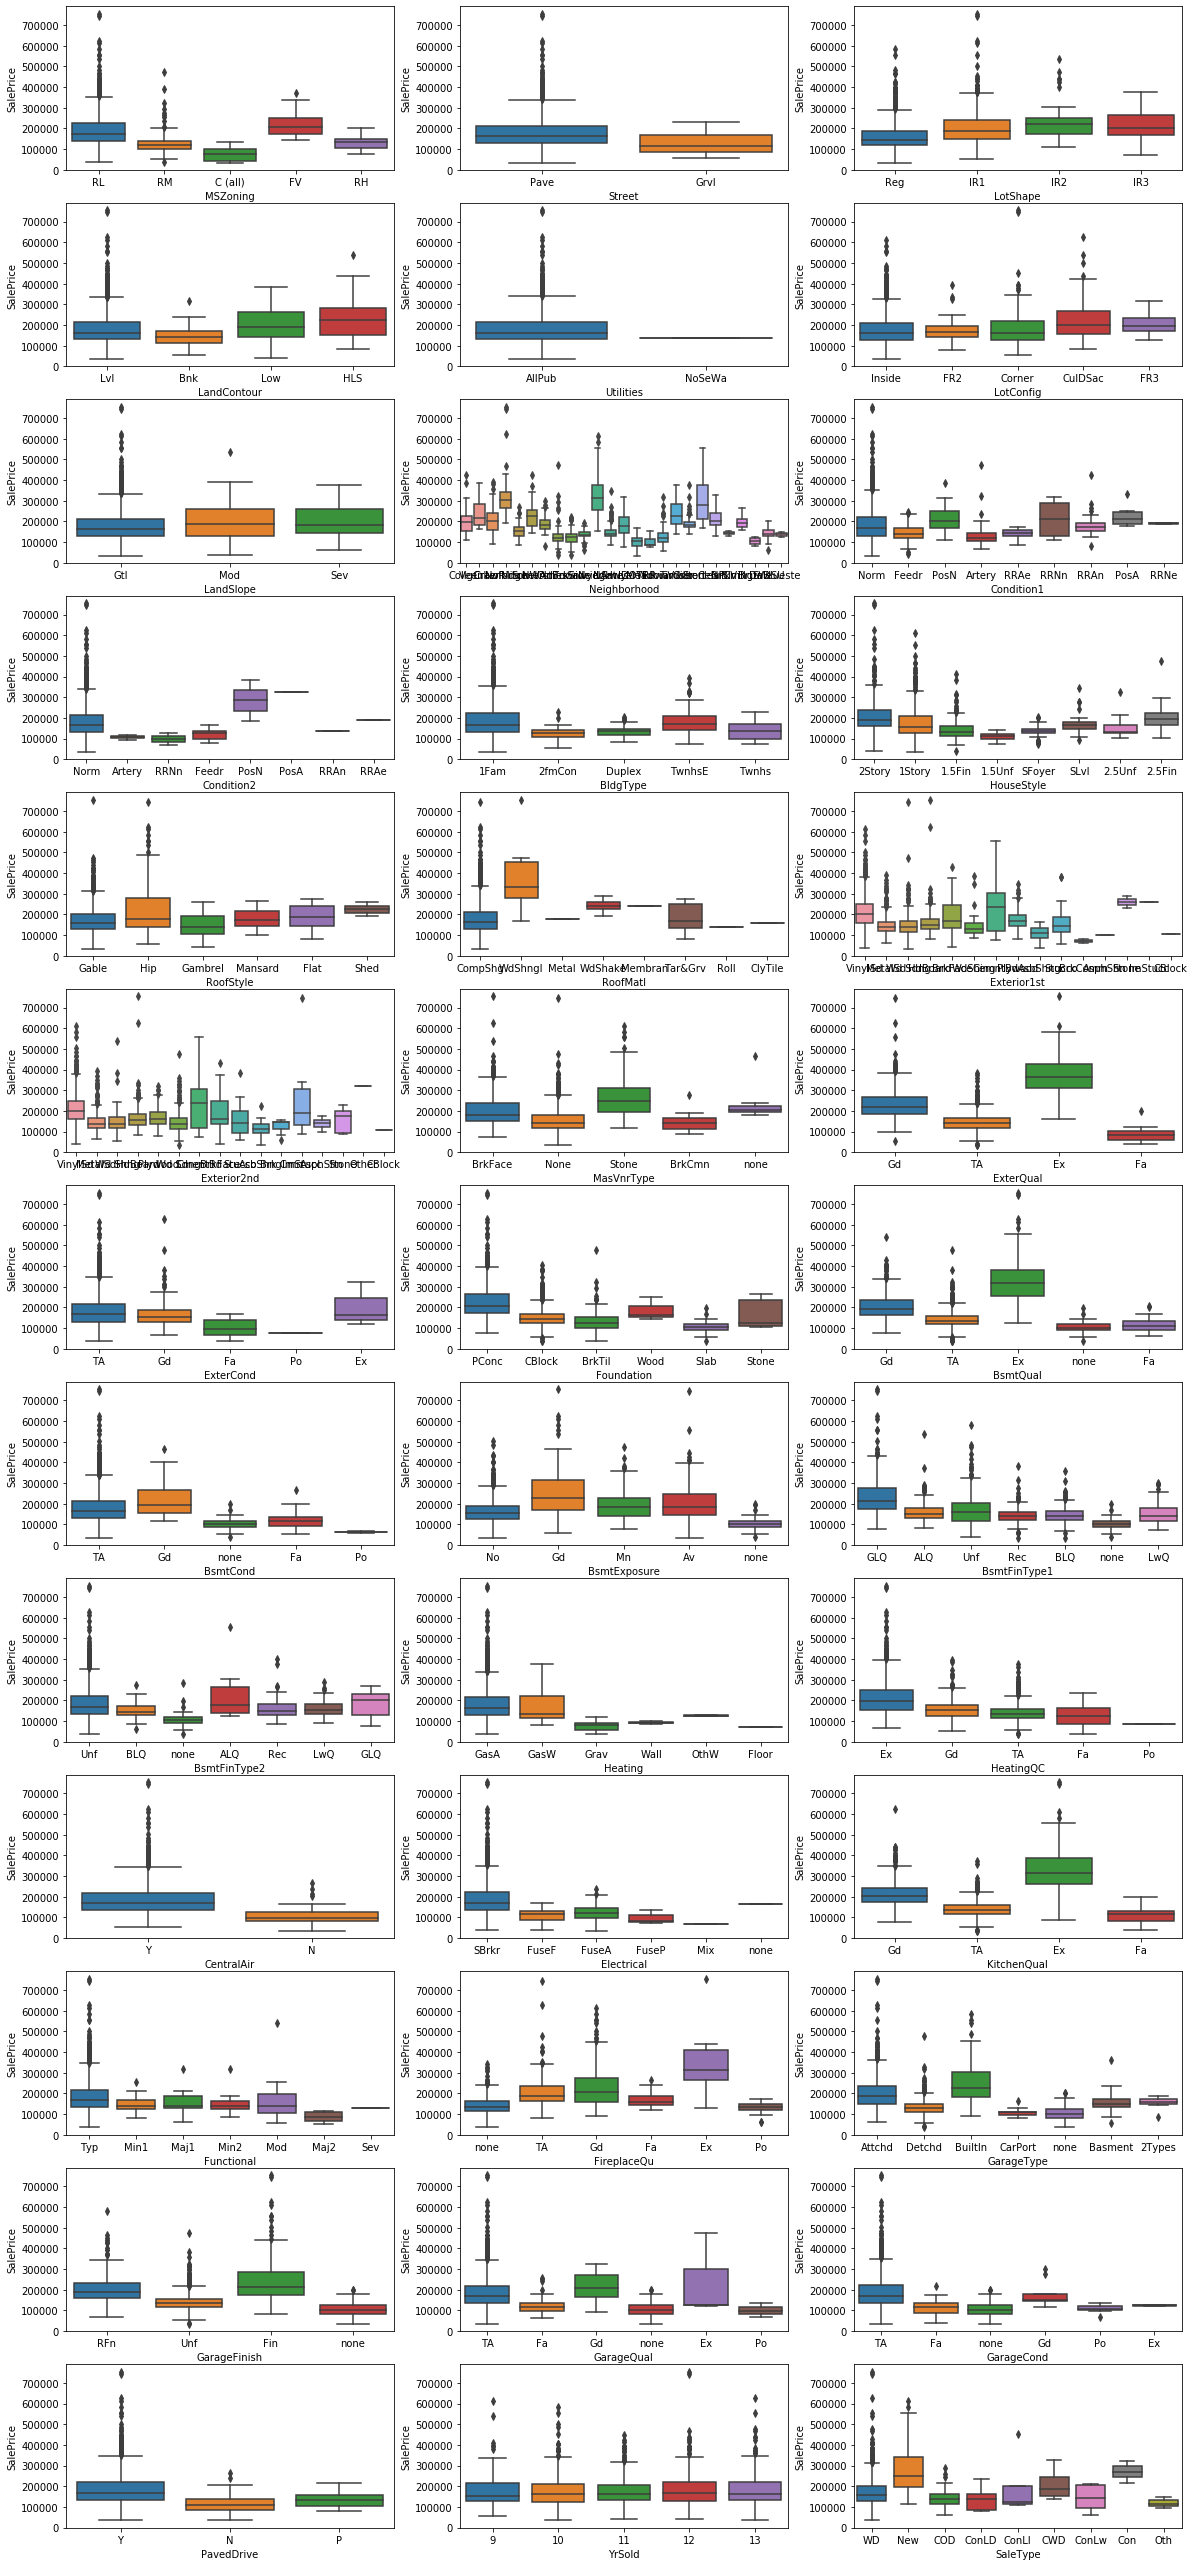

In [79]:
plot_categorical(df_cat.columns)

In [80]:
df.shape

(1460, 76)

In [81]:
df_dum = pd.get_dummies(df_cat,drop_first=True)
df_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [82]:
df = df.drop(list(df_cat.columns),axis =1)
df.shape

(1460, 36)

In [83]:
# concat dummy variables with X
df = pd.concat([df, df_dum], axis=1)

In [84]:
X=df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])

In [85]:
#Get the revised list of numerical and categorical variables as we have done soome transformations and created new cols
numcols = X.select_dtypes(include=['float64','int64']).columns.tolist()
catcols = X.select_dtypes(include='object').columns.tolist()

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = X.columns
# scaling the numeric columns as we have created dummies for categorical variables
X_train[numcols] = scaler.fit_transform(X_train[numcols])
X_test[numcols] = scaler.transform(X_test[numcols])

F:\ anaconda python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\ anaconda python\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
F:\ anaconda python\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [88]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
folds = 5
model = GridSearchCV(estimator = ridge,
                     param_grid = params,
                     scoring ='neg_mean_squared_error',
                     cv=folds,
                     return_train_score=True,
                     verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [89]:
#checking the value of optimum number of parameters
print(model.best_params_)
print(model.best_score_)


{'alpha': 50}
-0.023087450553195752


In [90]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.048870,0.005163,0.009774,0.001323,0.0001,{'alpha': 0.0001},-0.016797,-0.076851,-0.016035,-0.060504,-0.058577,-0.045753,0.024782,28,-0.006605,-0.006997,-0.006551,-0.006654,-0.006397,-0.006641,0.000198
1,0.054054,0.019517,0.013764,0.011167,0.001,{'alpha': 0.001},-0.016886,-0.075078,-0.016015,-0.060440,-0.057389,-0.045162,0.024195,27,-0.006606,-0.006997,-0.006553,-0.006654,-0.006398,-0.006642,0.000198
2,0.053856,0.018562,0.008178,0.000977,0.01,{'alpha': 0.01},-0.017719,-0.061019,-0.015996,-0.059883,-0.048010,-0.040525,0.019862,26,-0.006686,-0.007064,-0.006643,-0.006656,-0.006453,-0.006700,0.000199
3,0.041290,0.004213,0.008178,0.001466,0.05,{'alpha': 0.05},-0.019865,-0.034736,-0.016727,-0.058396,-0.031019,-0.032149,0.014735,25,-0.007271,-0.007670,-0.007318,-0.006677,-0.006973,-0.007182,0.000336
4,0.039893,0.007024,0.011370,0.001198,0.1,{'alpha': 0.1},-0.020766,-0.024948,-0.017369,-0.057455,-0.025252,-0.029158,0.014444,24,-0.007770,-0.008280,-0.007887,-0.006713,-0.007514,-0.007633,0.000522
5,0.033909,0.010326,0.005983,0.001893,0.2,{'alpha': 0.2},-0.021124,-0.018879,-0.017912,-0.056491,-0.022112,-0.027304,0.014671,23,-0.008320,-0.008998,-0.008486,-0.006793,-0.008165,-0.008153,0.000735
6,0.023739,0.002706,0.005384,0.000489,0.3,{'alpha': 0.3},-0.021069,-0.016739,-0.018111,-0.055951,-0.021134,-0.026601,0.014773,22,-0.008642,-0.009417,-0.008816,-0.006873,-0.008550,-0.008460,0.000849
7,0.026123,0.001463,0.005590,0.001205,0.4,{'alpha': 0.4},-0.020942,-0.015647,-0.018196,-0.055583,-0.020655,-0.026205,0.014813,20,-0.008870,-0.009706,-0.009040,-0.006949,-0.008815,-0.008676,0.000920
8,0.030918,0.006370,0.006981,0.001546,0.5,{'alpha': 0.5},-0.020807,-0.014977,-0.018235,-0.055307,-0.020357,-0.025936,0.014829,19,-0.009048,-0.009925,-0.009209,-0.007021,-0.009015,-0.008844,0.000969
9,0.032513,0.010697,0.006781,0.002779,0.6,{'alpha': 0.6},-0.020680,-0.014517,-0.018251,-0.055086,-0.020143,-0.025735,0.014834,18,-0.009194,-0.010101,-0.009345,-0.007088,-0.009177,-0.008981,0.001005


In [91]:
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [92]:
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9091420152176427
0.8664160580362419


In [93]:
# ridge model parameters
model_parameters = list(ridge.coef_)
#model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(0.069, 'OverallQual'),
 (0.054, 'GrLivArea'),
 (0.051, 'GarageCars'),
 (0.043, 'OverallCond'),
 (-0.042, 'YearBuilt'),
 (0.042, 'Neighborhood_Crawfor'),
 (0.038, 'FullBath'),
 (-0.038, 'Neighborhood_Edwards'),
 (0.037, '2ndFlrSF'),
 (0.036, 'Condition1_Norm'),
 (-0.036, 'BsmtFinType1_Unf'),
 (0.036, 'CentralAir_Y'),
 (0.033, 'SaleCondition_Normal'),
 (0.032, '1stFlrSF'),
 (0.03, 'Neighborhood_NridgHt'),
 (0.03, 'Functional_Typ'),
 (-0.029, 'YearRemodAdd'),
 (0.029, 'MSZoning_RL'),
 (-0.029, 'MSZoning_RM'),
 (0.028, 'Exterior1st_BrkFace'),
 (0.028, 'Foundation_PConc'),
 (-0.027, 'Neighborhood_IDOTRR'),
 (0.027, 'Neighborhood_StoneBr'),
 (0.026, 'BsmtFullBath'),
 (0.026, 'RoofMatl_CompShg'),
 (0.026, 'BsmtExposure_Gd'),
 (0.025, 'HalfBath'),
 (-0.025, 'KitchenQual_Gd'),
 (-0.024, 'BldgType_Twnhs'),
 (0.023, 'Fireplaces'),
 (0.023, 'PavedDrive_Y'),
 (0.023, 'SaleType_New'),
 (0.022, 'LotConfig_CulDSac'),
 (-0.022, 'KitchenQual_TA'),
 (0.022, 'FireplaceQu_Gd'),
 (0.021, 'Neighborhood_Brk

In [94]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
F:\ anaconda python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05565188231226337, tolerance: 0.013511195907140365
  positive)
F:\ anaconda python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04760287815386999, tolerance: 0.013309587502630203
  positive)
F:\ anaconda python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03989654749787608, tolerance: 0.012215105334961056
  positive)
F:\ anaconda python\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did 

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [95]:
print(model_cv.best_params_)
print(model_cv.best_score_)


{'alpha': 0.001}
-0.09107181040247328


In [96]:
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.908105941828082
0.8678702952437074


In [98]:
# lasso model parameters
model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
#lasso_selected_features = []
#for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
#    lasso_selected_features.append(v)
lasso_params = sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)
lasso_params



[(0.116, 'GrLivArea'),
 (0.082, 'Neighborhood_Crawfor'),
 (0.07, 'OverallQual'),
 (0.069, 'GarageCars'),
 (0.063, 'SaleType_New'),
 (0.061, 'Neighborhood_StoneBr'),
 (0.056, 'Neighborhood_NridgHt'),
 (0.055, 'CentralAir_Y'),
 (-0.052, 'YearBuilt'),
 (-0.052, 'BsmtFinType1_Unf'),
 (-0.048, 'MSZoning_RM'),
 (0.048, 'Condition1_Norm'),
 (-0.047, 'Neighborhood_Edwards'),
 (0.046, 'OverallCond'),
 (0.046, 'Exterior1st_BrkFace'),
 (-0.044, 'BldgType_Twnhs'),
 (0.043, 'BsmtExposure_Gd'),
 (0.043, 'SaleCondition_Normal'),
 (0.042, 'Functional_Typ'),
 (0.038, 'FullBath'),
 (0.036, 'RoofMatl_CompShg'),
 (0.034, 'LotConfig_CulDSac'),
 (0.031, 'ExterCond_TA'),
 (-0.031, 'KitchenQual_Gd'),
 (0.029, 'BsmtFullBath'),
 (0.029, 'Foundation_PConc'),
 (0.028, 'Neighborhood_Somerst'),
 (0.027, 'Neighborhood_BrkSide'),
 (-0.026, 'KitchenQual_TA'),
 (-0.025, 'YearRemodAdd'),
 (-0.025, 'Neighborhood_IDOTRR'),
 (0.025, 'Neighborhood_NoRidge'),
 (-0.021, 'HouseStyle_2Story'),
 (-0.021, 'Foundation_Slab'),
 (0.

In [99]:
top5 = [x for beta, x in lasso_params[1:6]]
top5

['Neighborhood_Crawfor',
 'OverallQual',
 'GarageCars',
 'SaleType_New',
 'Neighborhood_StoneBr']

In [100]:
#doubling ridge
alpha = 100
ridge_1 = Ridge(alpha=alpha,random_state = 42)

ridge_1.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=42, solver='auto', tol=0.001)

In [101]:
y_train_pred = ridge_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9012150449872929
0.8643551842726028


In [102]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge_1.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

OverallQual        0.070518
GrLivArea          0.048927
GarageCars         0.043805
OverallCond        0.040632
YearBuilt         -0.039890
2ndFlrSF           0.033105
FullBath           0.031517
YearRemodAdd      -0.030049
1stFlrSF           0.029202
Condition1_Norm    0.029017
dtype: float64

In [103]:
# double lasso
alpha = 0.002
lasso_1 = Lasso(alpha=alpha,random_state = 42)

lasso_1.fit(X_train, y_train)



Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
y_train_pred = lasso_1.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso_1.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8947449245928565
0.8618922914226035


In [105]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso_1.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               0.116041
OverallQual             0.080168
GarageCars              0.071765
MSZoning_RM            -0.058499
Neighborhood_Crawfor    0.055171
YearBuilt              -0.054691
OverallCond             0.044424
BsmtFinType1_Unf       -0.043341
Condition1_Norm         0.040963
SaleType_New            0.037317
dtype: float64

In [106]:
# Checking all Neighborhood dummy variables
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [107]:
# Droping above features from X_train and X_test
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 211), (438, 211))

In [108]:
# Building Lasso model with these features
lasso3= Lasso(alpha= 0.002)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

2ndFlrSF          0.108785
CentralAir_Y      0.100989
1stFlrSF          0.095346
Functional_Typ    0.091539
GarageCars        0.088995
dtype: float64

In [110]:
y_train_pred = lasso3.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = lasso3.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8690337761369153
0.8198175106217247
